In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("mentalhealthdataset.csv")

In [4]:
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [6]:
data.shape

(292364, 17)

In [7]:
data.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [8]:
print(data['Gender'].unique())
print(data['Country'].unique())
print(data['Occupation'].unique())
print(data['self_employed'].unique())
print(data['family_history'].unique())
print(data['treatment'].unique())
print(data['Days_Indoors'].unique())
print(data['Growing_Stress'].unique())
print(data['Changes_Habits'].unique())
print(data['Mental_Health_History'].unique())
print(data['Mood_Swings'].unique())
print(data['Coping_Struggles'].unique())
print(data['Work_Interest'].unique())
print(data['Social_Weakness'].unique())
print(data['mental_health_interview'].unique())
print(data['care_options'].unique())


['Female' 'Male']
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']
['Corporate' 'Student' 'Business' 'Housewife' 'Others']
[nan 'No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']
['Yes' 'No' 'Maybe']
['No' 'Yes' 'Maybe']
['Yes' 'No' 'Maybe']
['Medium' 'Low' 'High']
['No' 'Yes']
['No' 'Maybe' 'Yes']
['Yes' 'No' 'Maybe']
['No' 'Maybe' 'Yes']
['Not sure' 'No' 'Yes']


In [9]:
data['self_employed'].value_counts(dropna=False)

self_employed
No     257994
Yes     29168
NaN      5202
Name: count, dtype: int64

In [10]:
data['self_employed']=data['self_employed'].fillna('No')

In [11]:
data['self_employed'].value_counts(dropna=False)

self_employed
No     263196
Yes     29168
Name: count, dtype: int64

In [12]:
data.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

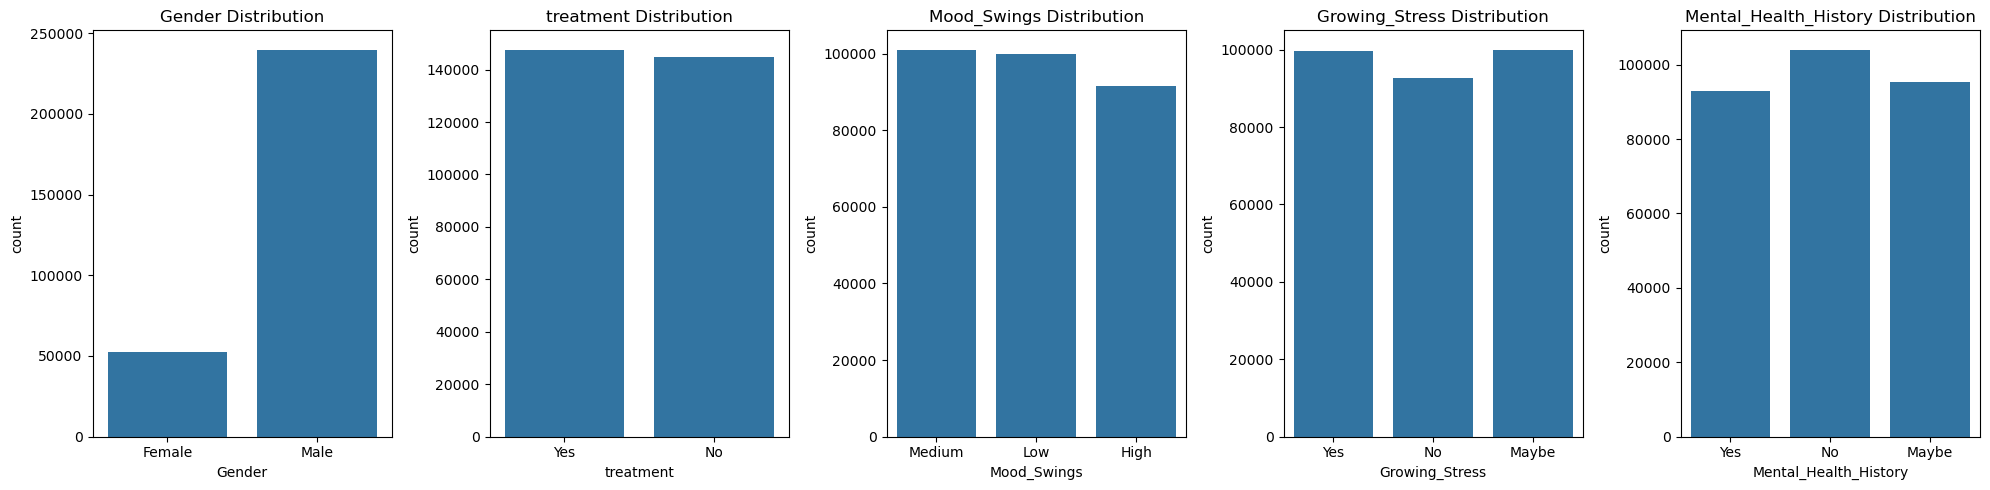

In [13]:
features= ['Gender','treatment','Mood_Swings','Growing_Stress','Mental_Health_History']
fig, axes=plt.subplots(1,5, figsize=(20,5))

for i,feature in enumerate(features) :
    sns.countplot(x=feature,data=data,ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.savefig("count_plots.png", dpi=300)
plt.show()

In [14]:
plt.savefig("count_plots.png", dpi=300)

<Figure size 640x480 with 0 Axes>

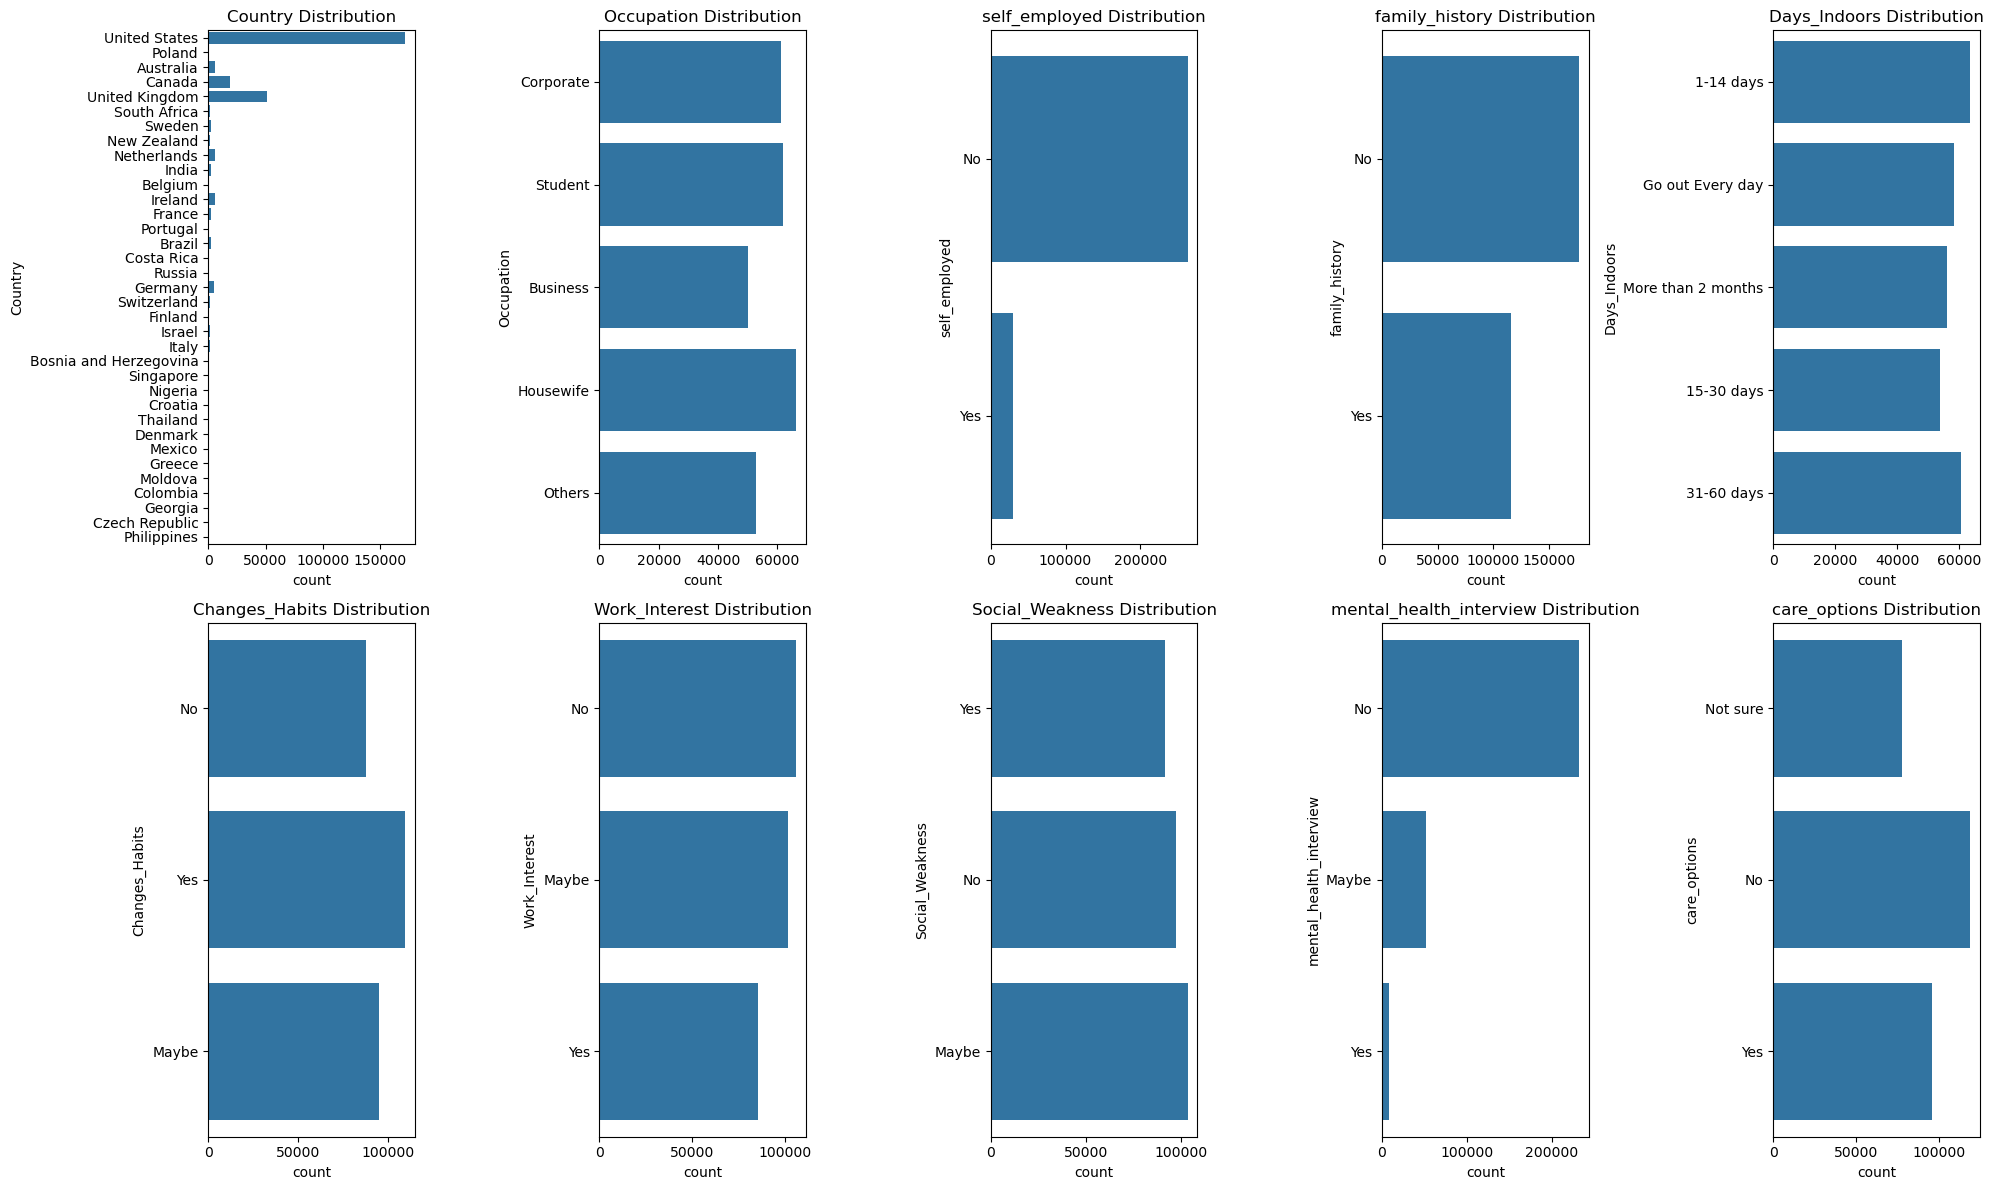

In [15]:
features = ['Country', 'Occupation', 'self_employed', 'family_history', 'Days_Indoors',
            'Changes_Habits', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
fig, axes = plt.subplots(2, 5, figsize=(20, 12))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.countplot(y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.savefig("count_plots2.png", dpi=300)
plt.show()

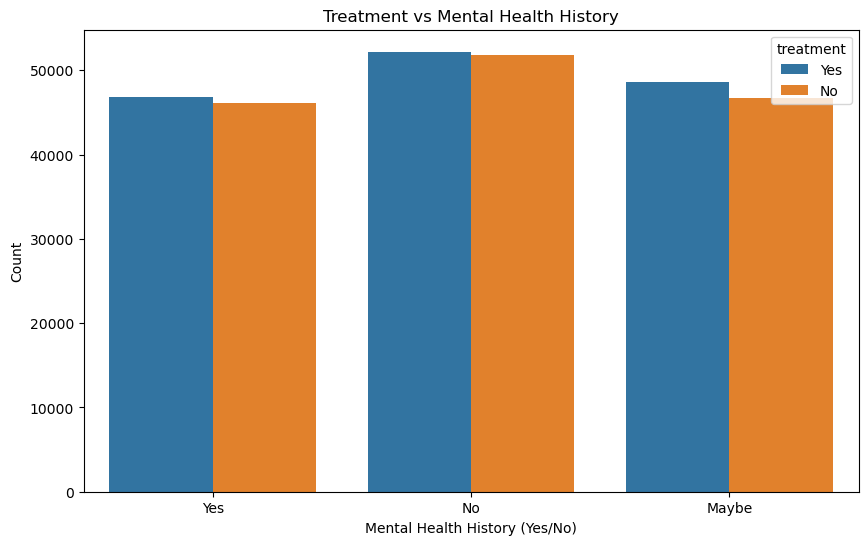

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='Mental_Health_History', hue='treatment', data=data)

plt.title('Treatment vs Mental Health History')
plt.xlabel('Mental Health History (Yes/No)')
plt.ylabel('Count')

plt.show()

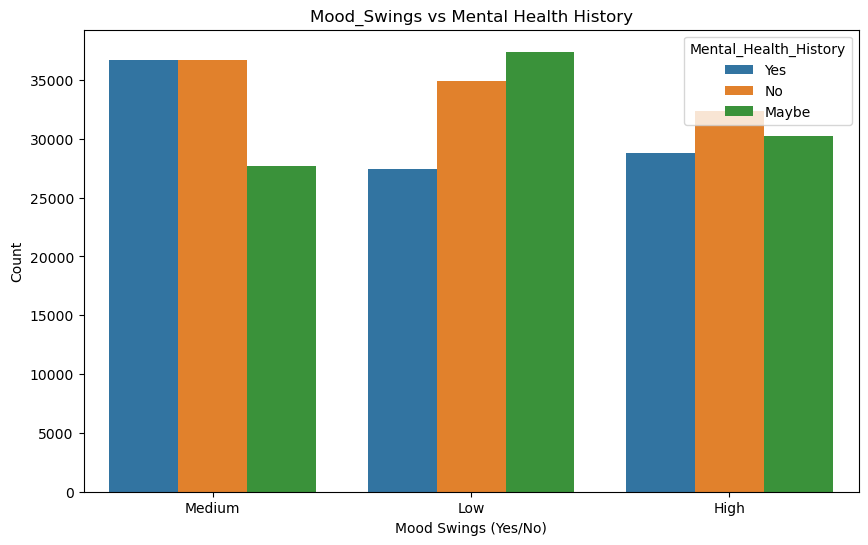

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Mood_Swings', hue='Mental_Health_History', data=data)

plt.title('Mood_Swings vs Mental Health History')
plt.xlabel('Mood Swings (Yes/No)')
plt.ylabel('Count')

plt.show()

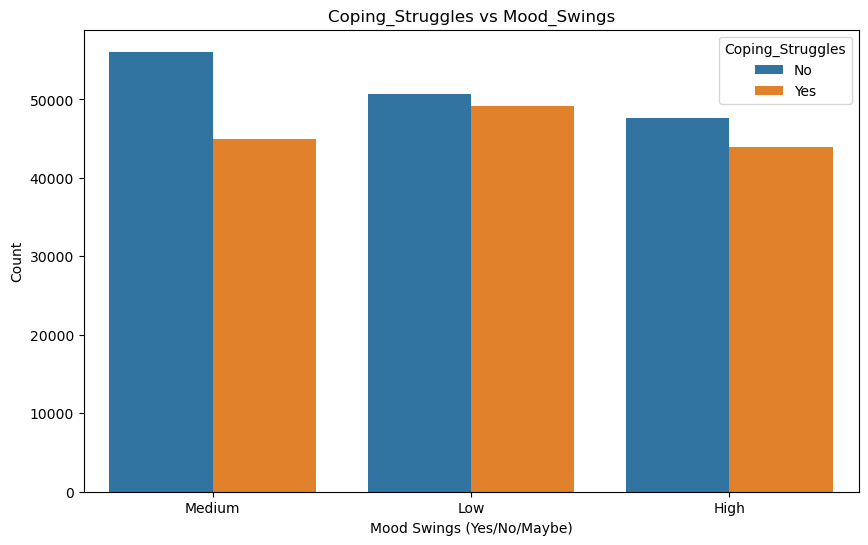

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Mood_Swings', hue='Coping_Struggles', data=data)

plt.title('Coping_Struggles vs Mood_Swings')
plt.xlabel('Mood Swings (Yes/No/Maybe)')
plt.ylabel('Count')

plt.show()

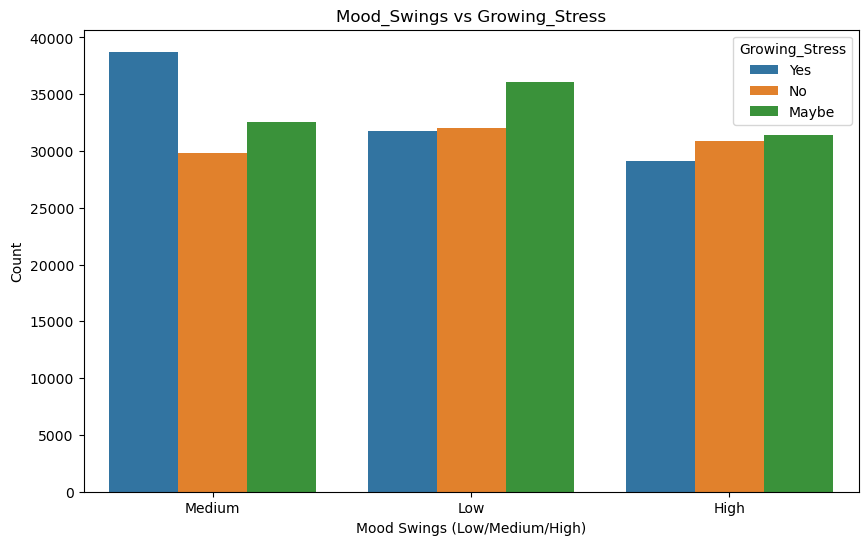

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Mood_Swings', hue='Growing_Stress', data=data)

plt.title('Mood_Swings vs Growing_Stress')
plt.xlabel('Mood Swings (Low/Medium/High)')
plt.ylabel('Count')

plt.show()

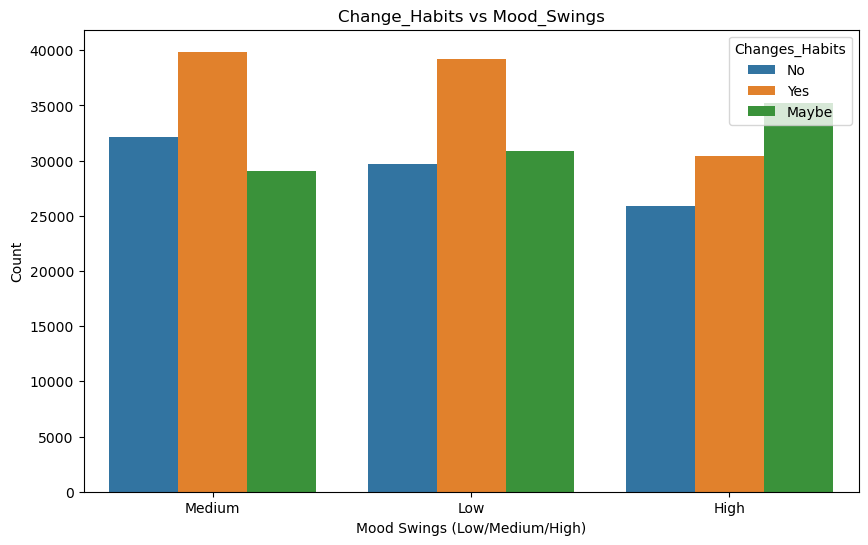

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Mood_Swings', hue='Changes_Habits', data=data)

plt.title('Change_Habits vs Mood_Swings')
plt.xlabel('Mood Swings (Low/Medium/High)')
plt.ylabel('Count')

plt.show()

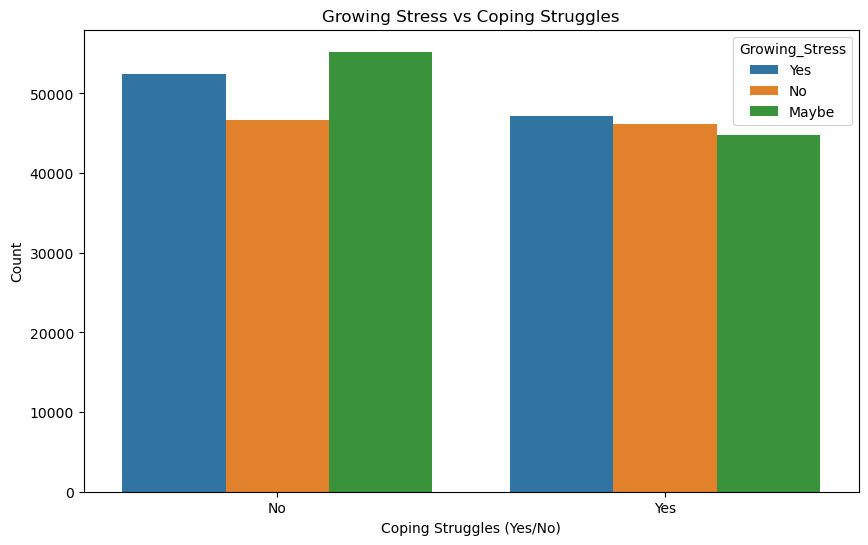

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='Coping_Struggles', hue='Growing_Stress', data=data)

plt.title('Growing Stress vs Coping Struggles')
plt.xlabel('Coping Struggles (Yes/No)')
plt.ylabel('Count')

plt.show()

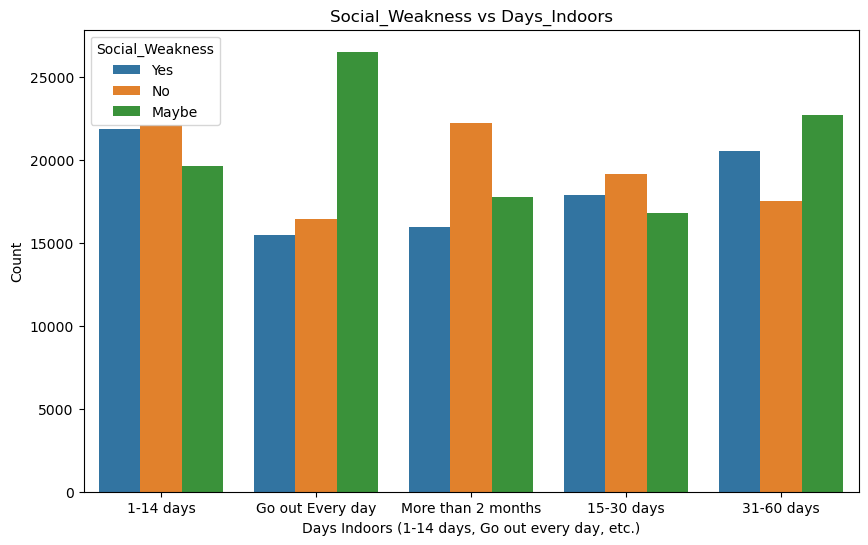

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Days_Indoors', hue='Social_Weakness', data=data)

plt.title('Social_Weakness vs Days_Indoors')
plt.xlabel('Days Indoors (1-14 days, Go out every day, etc.)')
plt.ylabel('Count')

plt.show()

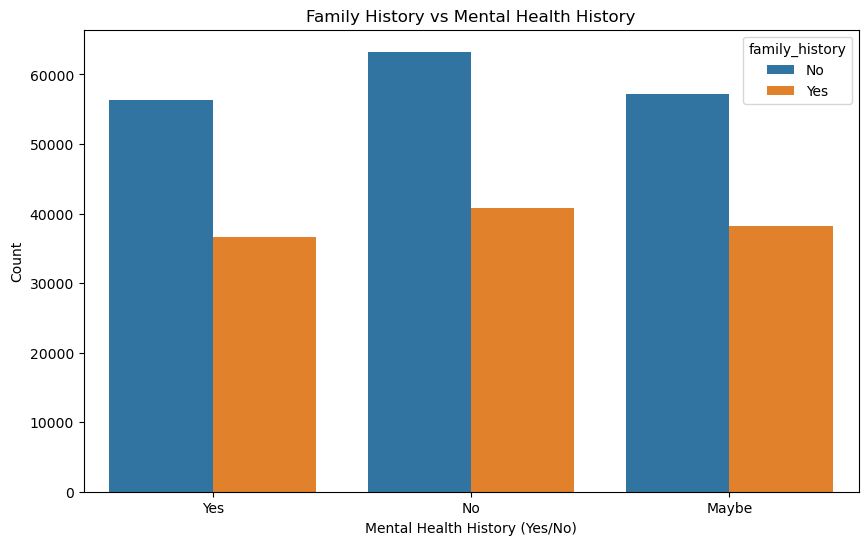

In [23]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Mental_Health_History', hue='family_history', data=data)


plt.title('Family History vs Mental Health History')
plt.xlabel('Mental Health History (Yes/No)')
plt.ylabel('Count')


plt.show()

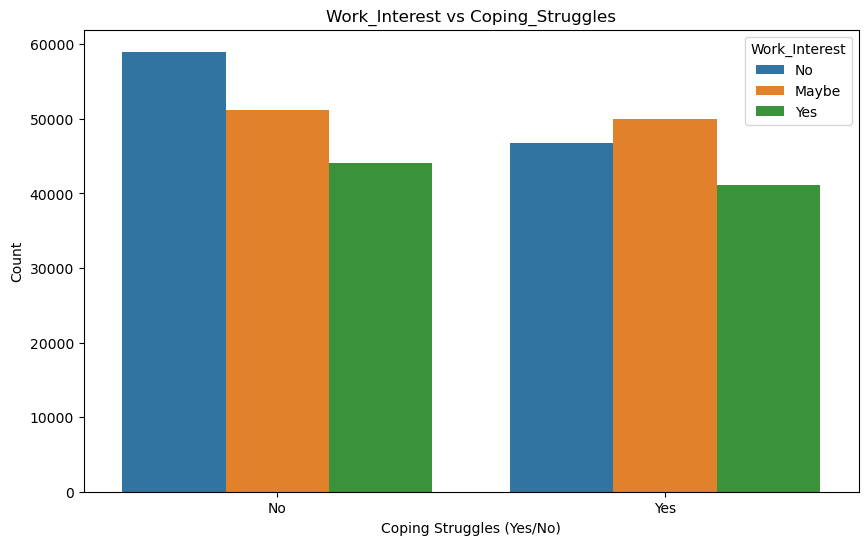

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Coping_Struggles', hue='Work_Interest', data=data)


plt.title('Work_Interest vs Coping_Struggles')
plt.xlabel('Coping Struggles (Yes/No)')
plt.ylabel('Count')


plt.show()

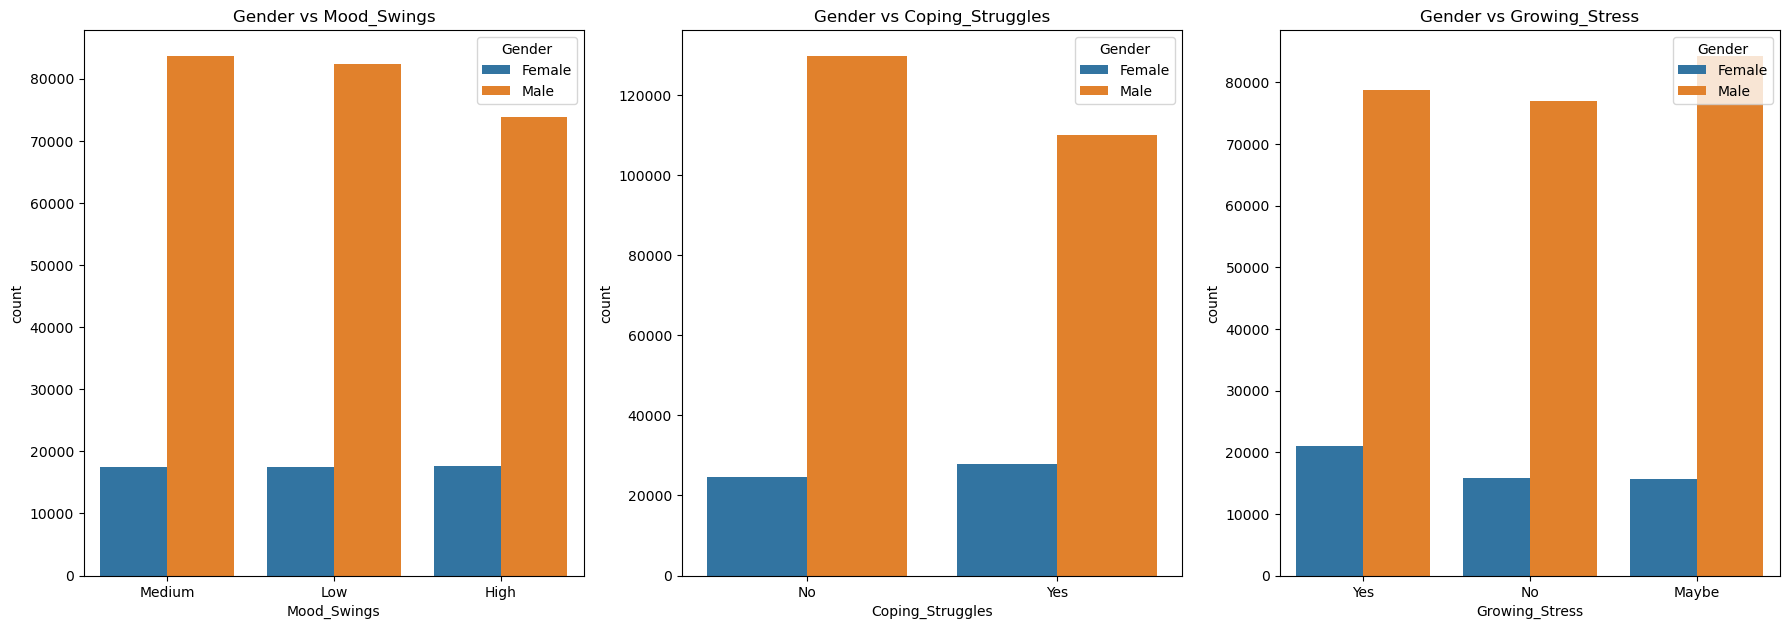

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
sns.countplot(x='Mood_Swings', hue='Gender', data=data)
plt.title('Gender vs Mood_Swings')


plt.subplot(2, 3, 2)
sns.countplot(x='Coping_Struggles', hue='Gender', data=data)
plt.title('Gender vs Coping_Struggles')


plt.subplot(2, 3, 3)
sns.countplot(x='Growing_Stress', hue='Gender', data=data)
plt.title('Gender vs Growing_Stress')


plt.tight_layout()


plt.show()


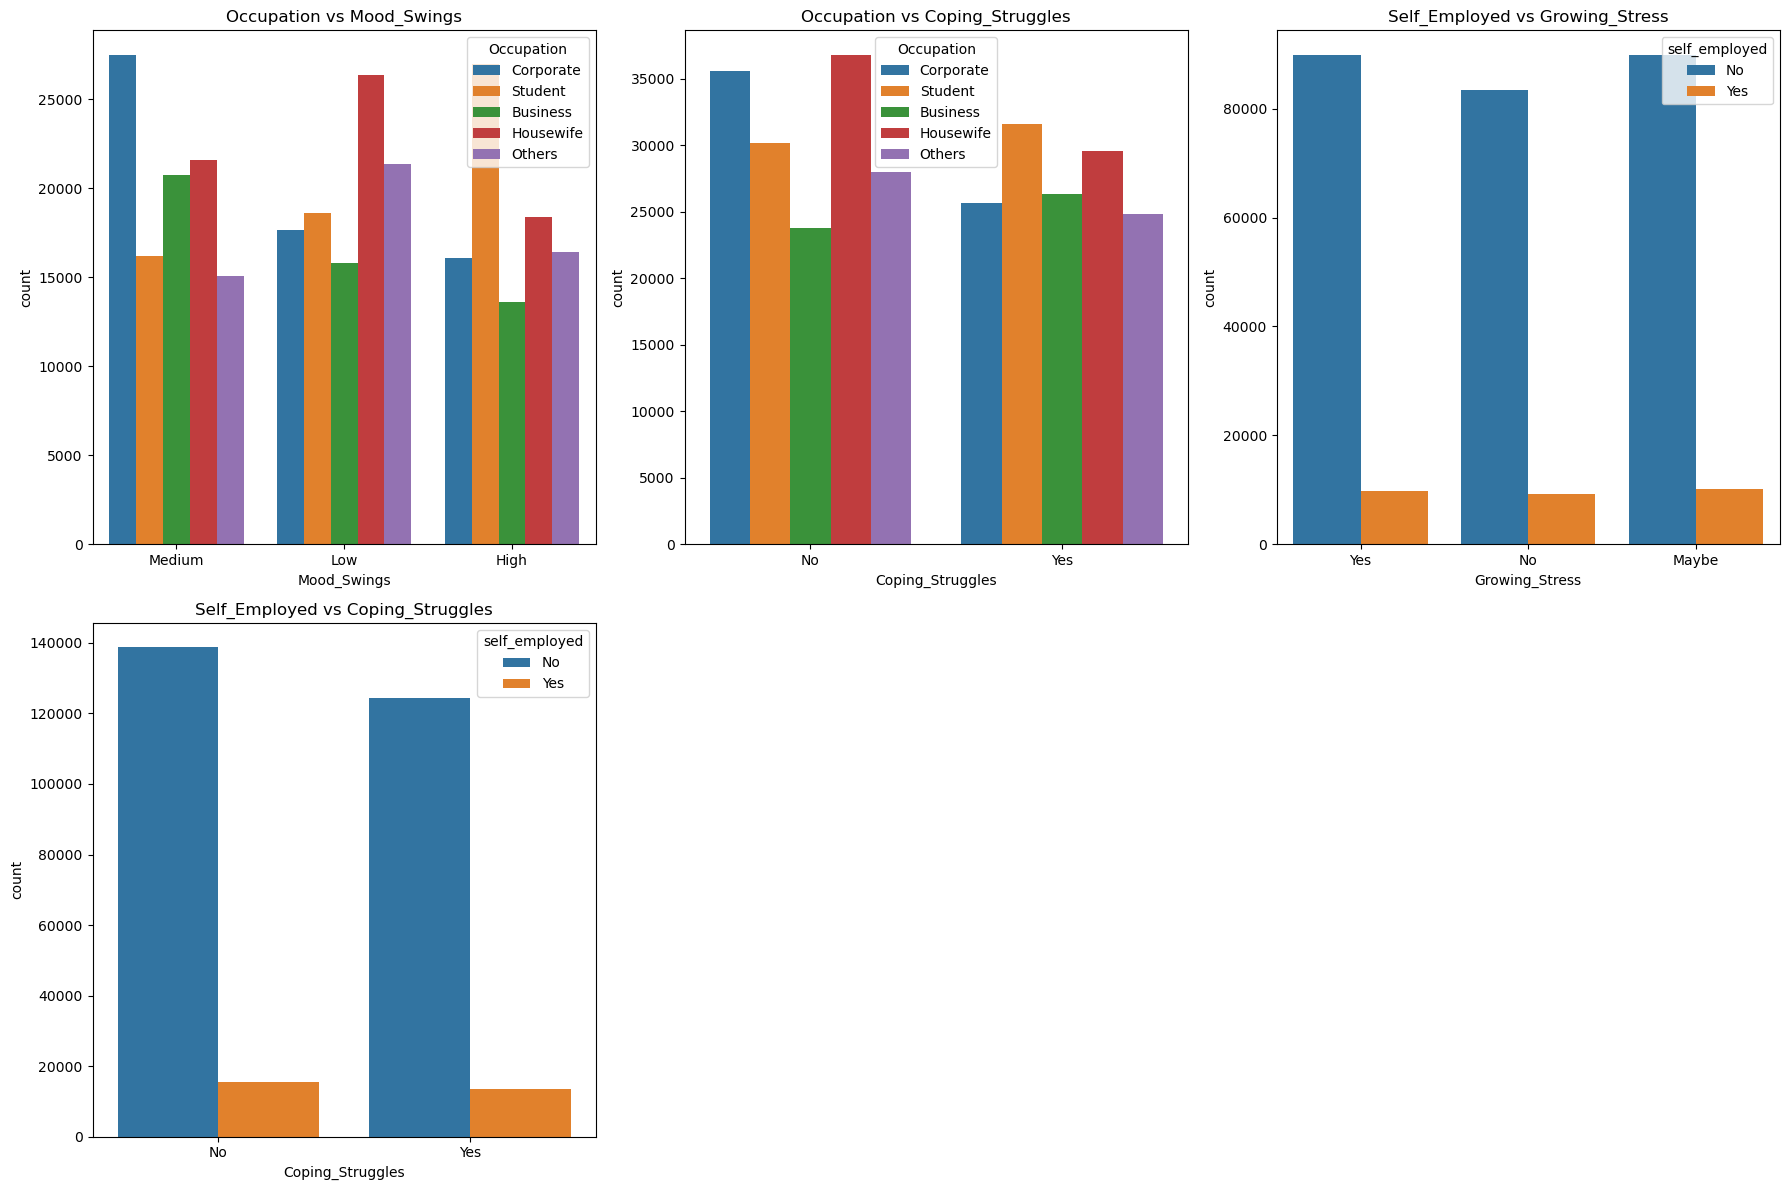

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
sns.countplot(x='Mood_Swings', hue='Occupation', data=data)
plt.title('Occupation vs Mood_Swings')


plt.subplot(2, 3, 2)
sns.countplot(x='Coping_Struggles', hue='Occupation', data=data)
plt.title('Occupation vs Coping_Struggles')


plt.subplot(2, 3, 3)
sns.countplot(x='Growing_Stress', hue='self_employed', data=data)
plt.title('Self_Employed vs Growing_Stress')


plt.subplot(2, 3, 4)
sns.countplot(x='Coping_Struggles', hue='self_employed', data=data)
plt.title('Self_Employed vs Coping_Struggles')


plt.tight_layout()


plt.show()


In [27]:
def risk_score(row):
    score=0
    if row['Mood_Swings']=='Medium':
        score+=1
    elif row['Mood_Swings']=='High':
        score+=2

    if row['Growing_Stress']=='Maybe':
        score+=1
    elif row['Growing_Stress']=='Yes':
        score+=2

    if row['Changes_Habits'] == 'Maybe':
        score += 1
    elif row['Changes_Habits'] == 'Yes':
        score += 2

    if row['Social_Weakness'] == 'Maybe':
        score += 1
    elif row['Social_Weakness'] == 'Yes':
        score += 2

    if row['Mental_Health_History'] == 'Maybe':
        score += 1
    elif row['Mental_Health_History'] == 'Yes':
        score += 2

    if row['Coping_Struggles'] == 'Yes':
        score += 2

    return score


In [28]:
data['Mental_Health_Risk']=data.apply(risk_score,axis=1)

In [29]:
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Mental_Health_Risk
0,8/27/2014 11:29,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,7
1,8/27/2014 11:31,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,7
2,8/27/2014 11:32,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,7
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,7
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,7


In [30]:
data['Risk_Level']= data['Mental_Health_Risk'].apply(
    lambda x:'Low' if x<=3 else ('Medium' if x<=6 else'High')
)


In [31]:
print(data['Risk_Level'].unique())

['High' 'Medium' 'Low']


In [32]:
data['Risk_Level'].value_counts()

Risk_Level
Medium    150154
High      110320
Low        31890
Name: count, dtype: int64

In [33]:
eda_data = data.copy()

In [34]:
from sklearn.preprocessing import LabelEncoder

binary_cols=['Gender','self_employed','family_history','treatment','Coping_Struggles']
for col in binary_cols:
    data[col]=LabelEncoder().fit_transform(data[col])

In [35]:
data['Days_Indoors']= data['Days_Indoors'].map({'Go out Every day': 0, '1-14 days': 1, '15-30 days': 2, '31-60 days': 3, 'More than 2 months': 4})

In [36]:
data['Growing_Stress'] = data['Growing_Stress'].map({'No': 0, 'Maybe': 1, 'Yes': 2})
data['Changes_Habits'] = data['Changes_Habits'].map({'No': 0, 'Maybe': 1, 'Yes': 2})
data['Mental_Health_History'] = data['Mental_Health_History'].map({'No': 0, 'Maybe': 1, 'Yes': 2})
data['Mood_Swings'] = data['Mood_Swings'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Work_Interest'] = data['Work_Interest'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Social_Weakness'] = data['Social_Weakness'].map({'No': 0, 'Maybe': 1, 'Yes': 2})
data['mental_health_interview'] = data['mental_health_interview'].map({'No': 0, 'Maybe': 1, 'Yes': 2})
data['care_options'] = data['care_options'].map({'No': 0, 'Maybe': 1, 'Yes': 2})


In [37]:
data = pd.get_dummies(data, columns=['Country', 'Occupation'], drop_first=True)

In [38]:
data=data.drop(columns=['Timestamp'])
data.head()

,Gender,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,...,Country_South Africa,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student
0,0,0,0,1,1,2,0,2,1,0,...,False,False,False,False,False,True,True,False,False,False
1,0,0,1,1,1,2,0,2,1,0,...,False,False,False,False,False,True,True,False,False,False
2,0,0,1,1,1,2,0,2,1,0,...,False,False,False,False,False,True,True,False,False,False
3,0,0,1,1,1,2,0,2,1,0,...,False,False,False,False,False,True,True,False,False,False
4,0,0,1,1,1,2,0,2,1,0,...,False,False,False,False,False,True,True,False,False,False


In [39]:
data.tail()

,Gender,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,...,Country_South Africa,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student
292359,1,1,1,1,2,0,1,0,0,1,...,False,False,False,False,False,True,False,False,False,False
292360,1,0,1,1,2,0,1,0,0,1,...,True,False,False,False,False,False,False,False,False,False
292361,1,0,1,0,2,0,1,0,0,1,...,False,False,False,False,False,True,False,False,False,False
292362,1,0,1,1,2,0,1,0,0,1,...,False,False,False,False,False,True,False,False,False,False
292363,1,0,1,1,2,0,1,0,0,1,...,False,False,False,False,False,True,False,False,False,False
